In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [2]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [3]:
co2_emissions_data = pd.read_csv('../../../data/atmosphere_biogeochemistry/global_carbon_project_CO2/processed/global_carbon_budget_processed.csv')
co2_mean = co2_emissions_data[co2_emissions_data['Reported value']=='mean']
co2_mean = co2_mean[co2_mean['Units']=='Pg CO2 yr-1']
co2_mean.rename(columns={'Year': 'year'}, inplace=True)
merged = co2_mean.merge(total_pop, on='year')
merged.dropna(inplace=True)

In [4]:
decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
ff_decades = np.zeros(6)
land_decades = np.zeros(6)
tot_decades = np.zeros(6)


for i in range(len(decades)-1):
    
    decade = decades[i]
    
    df_decade = merged[merged['year']>= decade]
    df_decade = merged[merged['year']< decades[i+1]]
    
    pop_decade = df_decade['pop_bil'].mean()
    ff_decade = df_decade[df_decade['Sink/source type']=='fossil fuel and industry']['Value'].mean() / pop_decade
    land_decade = df_decade[df_decade['Sink/source type']=='land-use change emissions']['Value'].mean() / pop_decade
    tot_decade = df_decade[df_decade['Sink/source type']=='anthropogenic emissions']['Value'].mean() / pop_decade
    
    ff_decades[i] = ff_decade
    land_decades[i] = land_decade
    tot_decades[i] = tot_decade

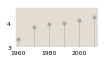

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [10$^{3}$ kg]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(ff_decades)*0.9,np.max(ff_decades)*1.1))

ax.plot(decades[0:-1], ff_decades, 'o', ms=3, color='darkgrey')
ax.vlines(decades[0:-1], 0, ff_decades, lw=0.5, color='darkgrey')

plt.savefig('../../../figures/database_paper/ff_emissions_decades.svg')

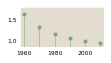

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [10$^{3}$ kg]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(land_decades)*0.9,np.max(land_decades)*1.1))

ax.plot(decades[0:-1], land_decades, 'o', ms=3, color=colors['green'])
ax.vlines(decades[0:-1], 0, land_decades, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/land_emissions_decades.svg')

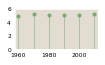

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [10$^{3}$ kg]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((0,6))

ax.plot(decades[0:-1], tot_decades, 'o', ms=3, color=colors['green'])
ax.vlines(decades[0:-1], 0, tot_decades, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/total_emissions_decades.svg')

In [31]:
co2_merged.tail()

,year,Flux into atmosphere,Sink/source type,Reported value,Units,Value,pop_bil
475,2018,sink,ocean sink,mean,Pg CO2 yr-1,9.64,7.632819
476,2018,sink,land sink,mean,Pg CO2 yr-1,12.72,7.632819
477,2018,source,budget imbalance,mean,Pg CO2 yr-1,0.88,7.632819
478,2018,source,anthropogenic emissions,mean,Pg CO2 yr-1,42.13,7.632819
479,2018,sink,natural sink,mean,Pg CO2 yr-1,22.36,7.632819


In [11]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"